In [108]:
import numpy as np
import os
import h5py
import sys
from tqdm import tqdm
from keras.utils import np_utils
import matplotlib.pyplot as plt
import skimage.morphology as morpholog
from skimage.filters import sobel
sys.path.append("..")
from utils import read_data
%matplotlib inline

In [37]:
X_train, y_train = read_data("../data/train/train_2048_128.h5", 2048)

In [38]:
X_train.shape

(9840, 6, 128, 128)

In [123]:
%%timeit -r1 -n1
for j in range(X_train.shape[0]):
    img = X_train[j]
    for i in range(img.shape[0]):
        morphed = (img[i] * 256).astype(np.int16)
        morphed = morpholog.dilation(morphed, morpholog.diamond(2))
        morphed = (morphed / 256).astype(np.float32)

50.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [124]:
def morph(img):
    for i in range(img.shape[0]):
        morphed = (img[i] * 255).astype(np.int16)
        morphed = morpholog.dilation(morphed, morpholog.diamond(2))
        morphed = (morphed / 255).astype(np.float32)
        img[i] = morphed
    return img

In [126]:
morph(img).shape

(6, 128, 128)

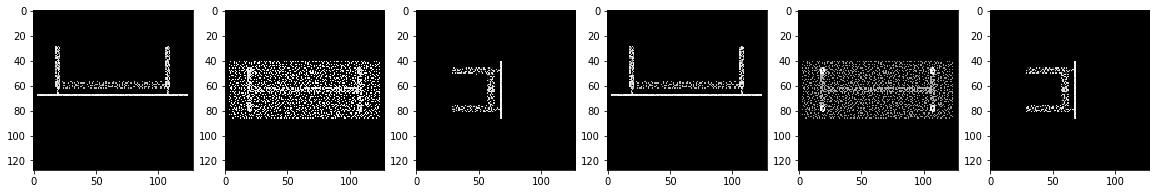

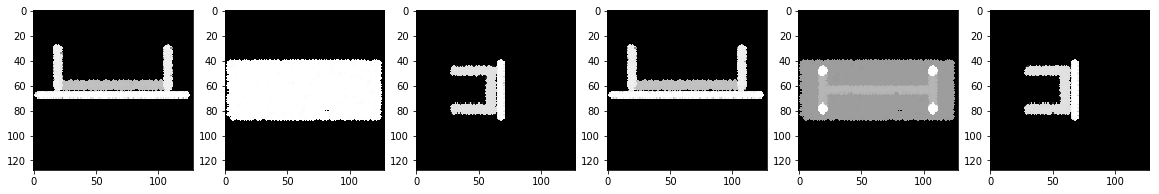

In [127]:
index = 124
img = X_train[index]
plt.figure(figsize=(20, 10))
for i in range(img.shape[0]):
    plt.subplot(1, 6, i+1)
    plt.imshow(img[i], cmap="gray")
plt.figure(figsize=(20, 10))
for i in range(img.shape[0]):
    plt.subplot(1, 6, i+1)
    morphed = (img[i] * 255).astype(np.int16)
    morphed = morpholog.dilation(morphed, morpholog.diamond(2))
    morphed = (morphed / 255).astype(np.float32)
    plt.imshow(morphed, cmap="gray")